In [43]:
# import modules
import sys
sys.path.append(r"./scripts")
import findspark
from pyspark.sql import SparkSession
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re

In [44]:
findspark.init()
spark_session = SparkSession.builder.appName('data_film').master("local[*]").getOrCreate()


In [45]:
# générer les données
from scripts import write_to_txt
write_to_txt.extract_data()

debut scrapping
extracting data done


In [46]:
data = spark_session.read.option("delimiter", "\t").csv('data/data_film.txt', header=False)
data = data.toDF('titre', 'date', 'duree', 'type', 'note', 'nombre avis', 'avis')

# Preprocess

In [47]:
from scripts import preprocess_for_ML_pyspark

data = preprocess_for_ML_pyspark.preproces_for_machine_learning(data, spark_session)

In [48]:

data.printSchema()

root
 |-- titre: string (nullable = true)
 |-- date: date (nullable = true)
 |-- duree: string (nullable = true)
 |-- type: string (nullable = true)
 |-- note: string (nullable = true)
 |-- nombre avis: string (nullable = true)
 |-- avis: string (nullable = true)



In [49]:
data.show(4)

+--------------------+----------+-----+--------------------+----+-----------+--------------------+
|               titre|      date|duree|                type|note|nombre avis|                avis|
+--------------------+----------+-----+--------------------+----+-----------+--------------------+
|Le Chat Potté 2 :...|2022-12-07|    1|Animation Comédie...| 4.1|         91|\nJe m\étais un p...|
|Le Royaume des ét...|2022-12-07|    1|Animation Famille...| 2.7|         14|\nJai beaucoup ai...|
|             Le Menu|2022-11-23|    1|            Thriller| 3.4|        175|\nHors d\oeuvre:U...|
|  Les Bonnes étoiles|2022-12-07|    2|               Drame| 3.8|         76|\nUne très sympat...|
+--------------------+----------+-----+--------------------+----+-----------+--------------------+
only showing top 4 rows



In [50]:
###########################################################################

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_pandas = data.toPandas()

In [52]:
data_pandas

,titre,date,duree,type,note,nombre avis,avis
0,Le Chat Potté 2 : la dernière quête,2022-12-07,1,Animation Comédie Aventure Famille,4.1,91,\nJe m\étais un peu lassé du style de Dreamwor...
1,Le Royaume des étoiles,2022-12-07,1,Animation Famille Aventure,2.7,14,\nJai beaucoup aimé ce film !Cest pour les plu...
2,Le Menu,2022-11-23,1,Thriller,3.4,175,\nHors d\oeuvre:Un intrigant et mystérieux thr...
3,Les Bonnes étoiles,2022-12-07,2,Drame,3.8,76,\nUne très sympathique comédie sociale que ce ...
4,Avatar : la voie de l'eau,2022-12-14,3,Science fiction Aventure Fantastique Action,4.4,081,\nEnfin de retour sur Pandora treize ans après...
5,Avatar,2009-12-16,2,Science fiction Aventure,4.3,896,\nPas trop friand de ce genre de film vu en fa...
6,Mon héroïne,2022-12-14,1,Comédie,3.2,85,"\nFilm très fin et très drôle, servi par des a..."
7,Les Huit Montagnes,2022-12-21,2,Drame,3.8,18,\nComme c’était déjà le cas avec Alabama Monro...
8,Le Torrent,2022-11-30,1,Thriller,3.1,145,\nCe nest pas un film policier mais un drame p...
9,Reste un peu,2022-11-16,1,Comédie,3.4,325,\nPeut-on apprécier Reste un peu si lon na pas...


# stat desc

<AxesSubplot: xlabel='type', ylabel='count'>

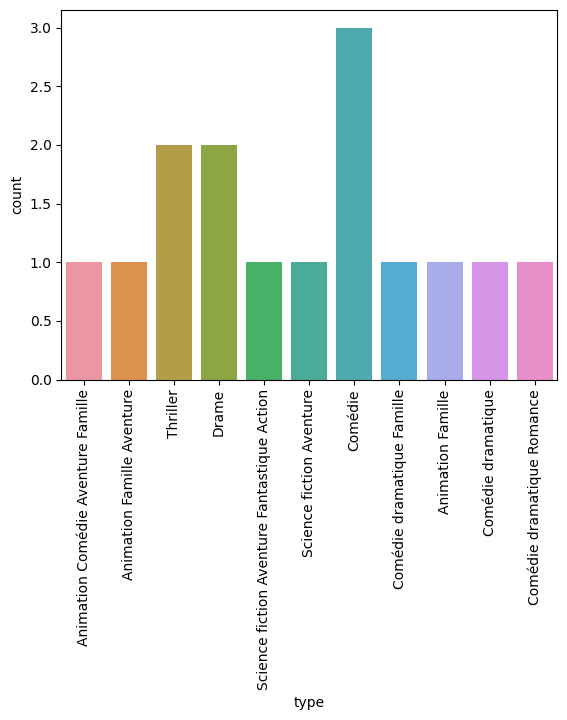

In [53]:
plt.xticks(rotation= 'vertical')
sns.countplot(x =data_pandas['type'])